In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,8)})
sns.set_theme(style="ticks")
import matplotlib.pyplot as plt
#import community
from networkx.algorithms.community import greedy_modularity_communities
#import community.community_louvain as cl
import pandas as pd
import scipy.stats as stats
import networkx as nx
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [4]:
df_squirrel = pd.read_csv('squirrel_weights.csv')

In [5]:
df_nodes=pd.read_csv('squirrel_labels.csv')

In [6]:
scaler = MinMaxScaler(feature_range=(0, 1)) #
df_squirrel['weight'] = scaler.fit_transform(df_squirrel[['weight']])#
df_squirrel.head()

,source,target,weight
0,0,514,0.310333
1,0,613,0.505085
2,0,633,0.787890
3,0,737,0.507025
4,0,782,0.632232


In [7]:
df_squirrel.describe()

,source,target,weight
count,198353.000000,198353.000000,198353.000000
mean,2200.193100,4150.558721,0.550584
std,1342.899028,993.292933,0.176408
min,0.000000,37.000000,0.000000
25%,1048.000000,3722.000000,0.443108
50%,2080.000000,4434.000000,0.563134
75%,3246.000000,4903.000000,0.669095
max,5196.000000,5200.000000,1.000000


In [8]:
squirrel_graph= nx.from_pandas_edgelist(df_squirrel, 'source', 'target', create_using=nx.DiGraph())

In [9]:
squirrel_graph.number_of_edges()

198353

In [10]:
GNN_dist= nx.from_pandas_edgelist(df_squirrel, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

In [11]:
df_squirrel_sim = df_squirrel[['source','target','weight']]
df_squirrel_sim['weight']= 1 - df_squirrel_sim['weight']
#df_squirrel_sim['weight']= 1 / df_squirrel_sim['weight']
df_squirrel_sim.head()

,source,target,weight
0,0,514,0.689667
1,0,613,0.494915
2,0,633,0.212110
3,0,737,0.492975
4,0,782,0.367768


In [12]:
GNN_sim= nx.from_pandas_edgelist(df_squirrel_sim, 'source', 'target', edge_attr='weight', 
                             create_using=nx.DiGraph())

# Degree Centrality

## GNN_squirrel

In [13]:
# Calculate the weighted degree centrality
def weighted_out_degree(G):
  # Calcolo della weighted out-degree centrality
  out_degrees = dict(G.out_degree(weight='weight'))
  max_weight = max(out_degrees.values())
  weighted_out_degrees = {node: (degree / max_weight) for node, degree in out_degrees.items()}

  # Calcolo della somma delle weighted out-degree centralities
  total_weighted_out_degree = sum(weighted_out_degrees.values())

  # Normalizzazione della weighted out-degree centrality
  weighted_out_degree_centrality_normalized = {node: (degree / total_weighted_out_degree) for node, degree in weighted_out_degrees.items()}
  return dict(sorted(weighted_out_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))
# Print the result

def weighted_in_degree(G):
  in_degrees = dict(G.in_degree(weight='weight'))
  max_weight = max(in_degrees.values())
  weighted_in_degrees = {node: (degree / max_weight) for node, degree in in_degrees.items()}

  # Calcolo della somma delle weighted in-degree centralities
  total_weighted_in_degree = sum(weighted_in_degrees.values())

  # Normalizzazione della weighted in-degree centrality
  weighted_in_degree_centrality_normalized = {node: (degree / total_weighted_in_degree) for node, degree in weighted_in_degrees.items()}

  return dict(sorted(weighted_in_degree_centrality_normalized.items(), key=lambda x: x[1], reverse=True))

In [14]:
GNN_dist_out_degree = weighted_out_degree(GNN_dist)
GNN_dist_in_degree = weighted_in_degree(GNN_dist)

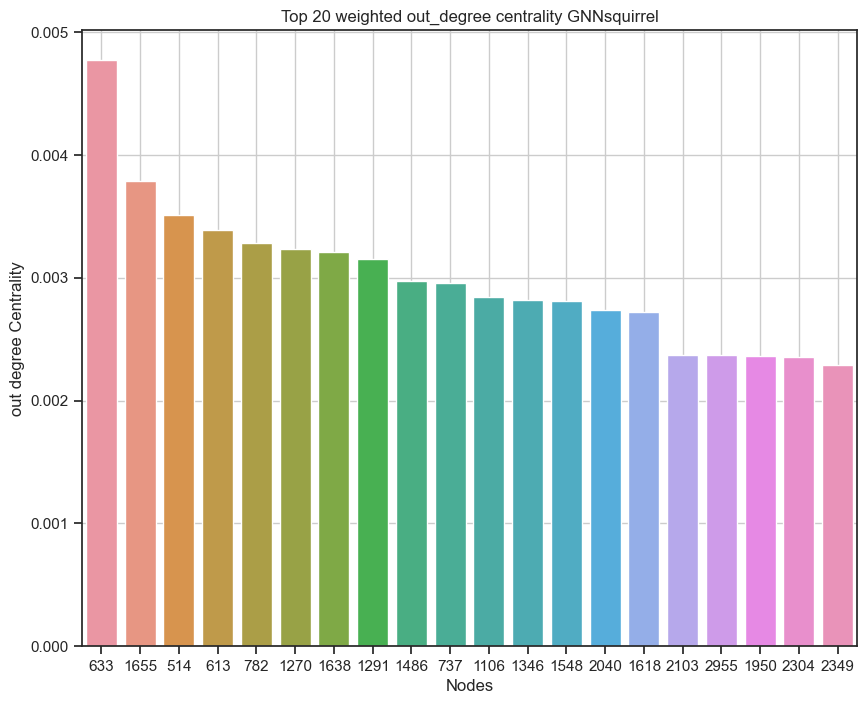

In [15]:
keys = list(map(str,list(GNN_dist_out_degree.keys())[:20]))
values = list(GNN_dist_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('out degree Centrality')
plt.title('Top 20 weighted out_degree centrality GNNsquirrel')
plt.grid()
plt.show()

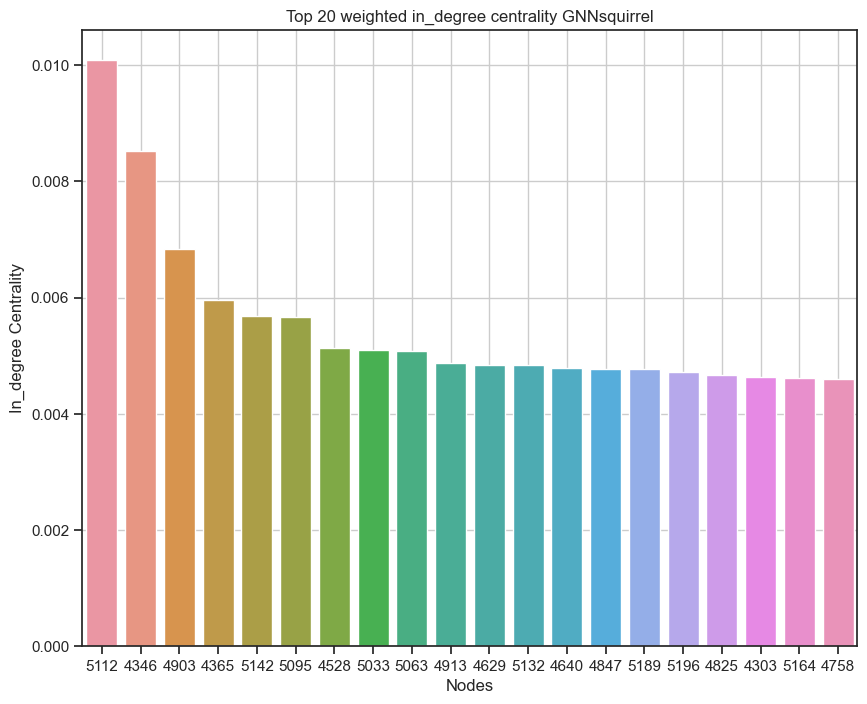

In [16]:
keys = list(map(str,list(GNN_dist_in_degree.keys())[:20]))
values = list(GNN_dist_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes')
plt.ylabel('In_degree Centrality')
plt.title('Top 20 weighted in_degree centrality GNNsquirrel')
plt.grid()
plt.show()

## squirrel graph

In [17]:
squirrel_out_degree = weighted_out_degree(squirrel_graph)
squirrel_in_degree = weighted_in_degree(squirrel_graph)

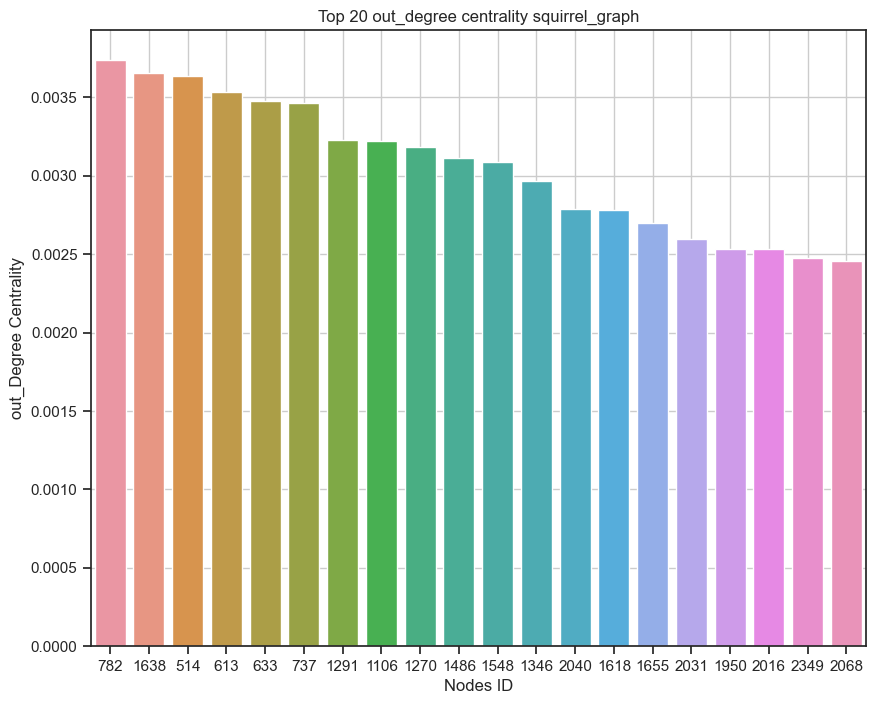

In [18]:

keys = list(map(str,list(squirrel_out_degree.keys())[:20]))
values = list(squirrel_out_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('out_Degree Centrality')
plt.title('Top 20 out_degree centrality squirrel_graph')
plt.grid()
plt.show()

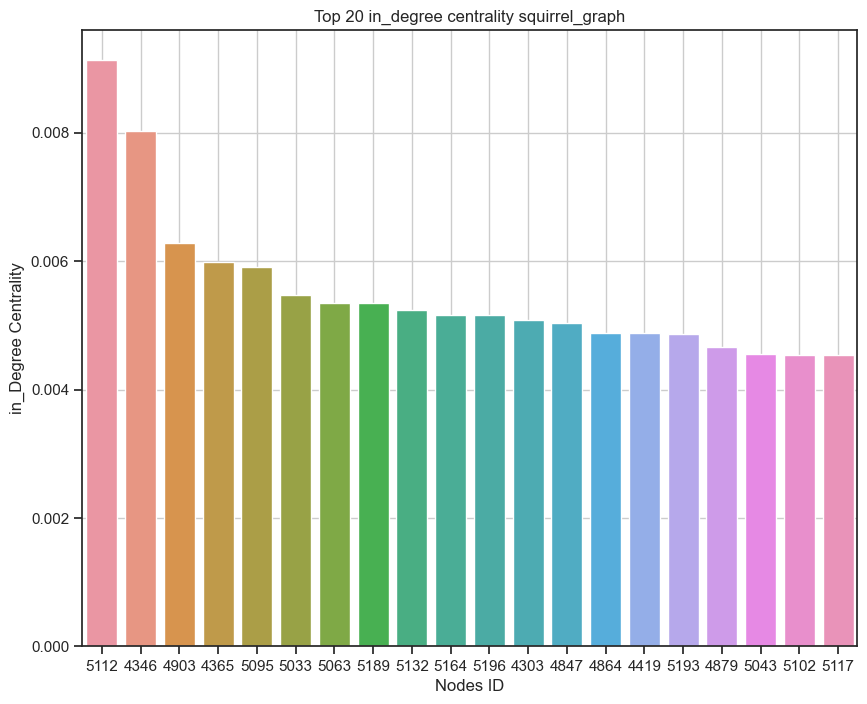

In [19]:
keys = list(map(str,list(squirrel_in_degree.keys())[:20]))
values = list(squirrel_in_degree.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('in_Degree Centrality')
plt.title('Top 20 in_degree centrality squirrel_graph')
plt.grid()
plt.show()

# Betweeness centrality

## GNN_squirrel

In [20]:
#questa centralità interpreta i pesi come distanza
GNN_betweeness = nx.betweenness_centrality(GNN_dist, weight = 'weight')

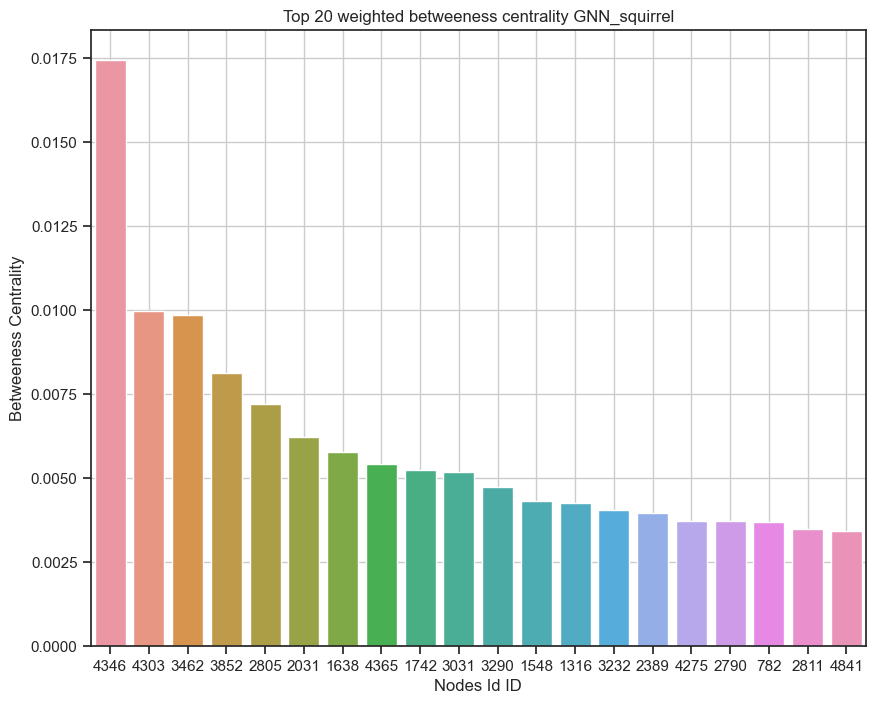

In [21]:
GNN_betweeness = dict(sorted(GNN_betweeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_betweeness.keys())[:20]))
values = list(GNN_betweeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes Id ID')
plt.ylabel('Betweeness Centrality')
plt.title('Top 20 weighted betweeness centrality GNN_squirrel')
plt.grid()
plt.show()

## squirrel graph

In [22]:
bet_squirrel_graph = nx.betweenness_centrality(squirrel_graph)

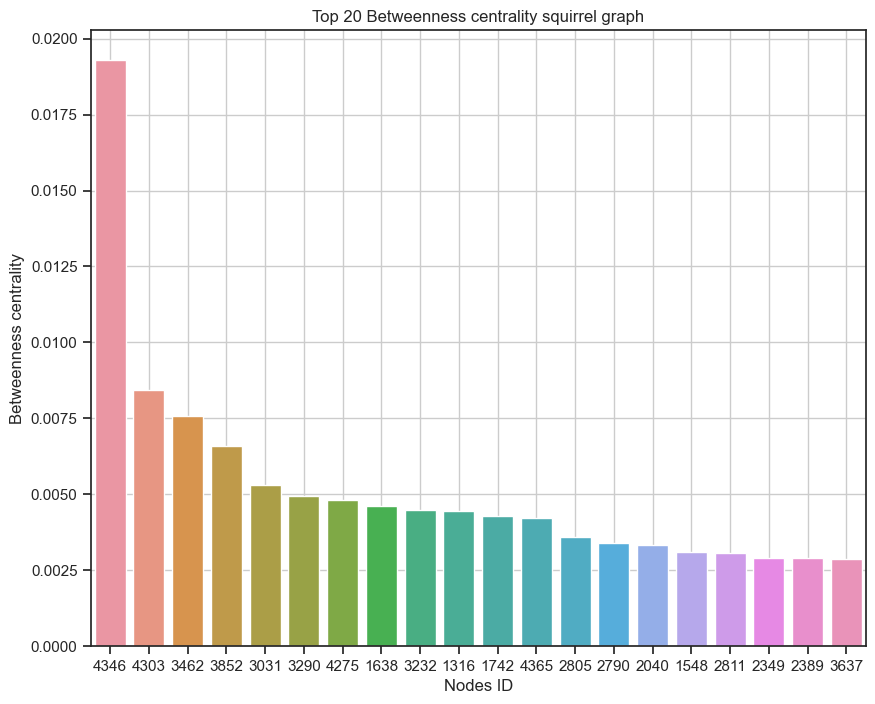

In [23]:
bet_squirrel_graph = dict(sorted(bet_squirrel_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(bet_squirrel_graph.keys())[:20]))
values = list(bet_squirrel_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Betweenness centrality')
plt.title('Top 20 Betweenness centrality squirrel graph')
plt.grid()
plt.show()

# Closeness Centrality

## GNN_squirrel

In [24]:
#questa centralità interpreta i pesi come distanza
GNN_closeness = nx.closeness_centrality(GNN_dist, distance = 'weight')

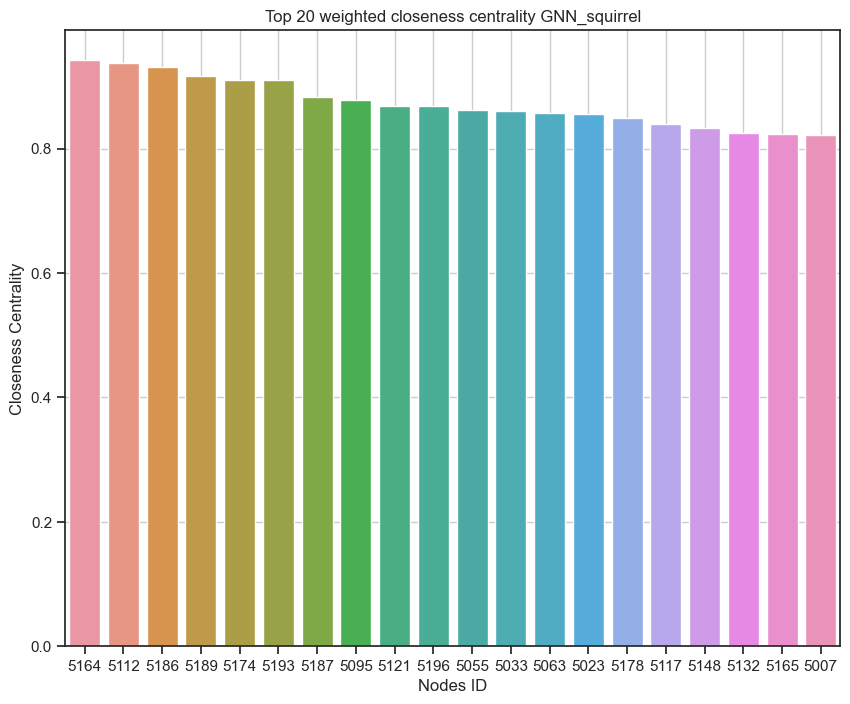

In [25]:
GNN_closeness = dict(sorted(GNN_closeness.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_closeness.keys())[:20]))
values = list(GNN_closeness.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness Centrality')
plt.title('Top 20 weighted closeness centrality GNN_squirrel')
plt.grid()
plt.show()

## squirrel

In [26]:
closeness_squirrel_graph = nx.closeness_centrality(squirrel_graph)

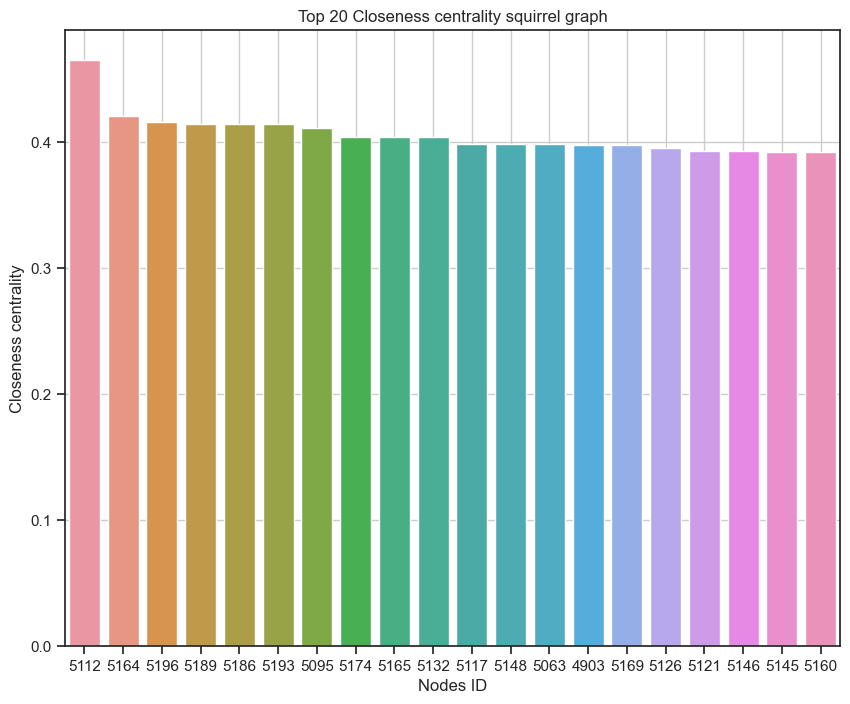

In [27]:
closeness_squirrel_graph = dict(sorted(closeness_squirrel_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(closeness_squirrel_graph.keys())[:20]))
values = list(closeness_squirrel_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Closeness centrality')
plt.title('Top 20 Closeness centrality squirrel graph')
plt.grid()
plt.show()

# Eigenvectror Centrality

## GNN_squirrel

In [28]:
GNN_eigenvector = nx.eigenvector_centrality(GNN_sim, weight = 'weight', max_iter = 1000)

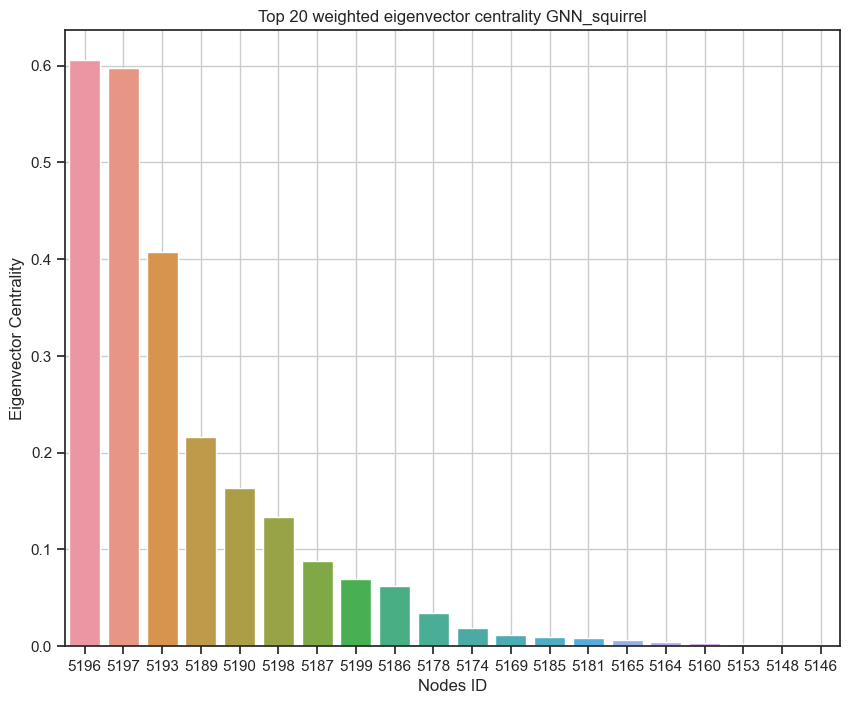

In [29]:
GNN_eigenvector = dict(sorted(GNN_eigenvector.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(GNN_eigenvector.keys())[:20]))
values = list(GNN_eigenvector.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Nodes ID')
plt.ylabel('Eigenvector Centrality')
plt.title('Top 20 weighted eigenvector centrality GNN_squirrel')
plt.grid()
plt.show()

## squirrel graph

In [30]:
eigen_squirrel_graph = nx.eigenvector_centrality(squirrel_graph, max_iter = 1000)

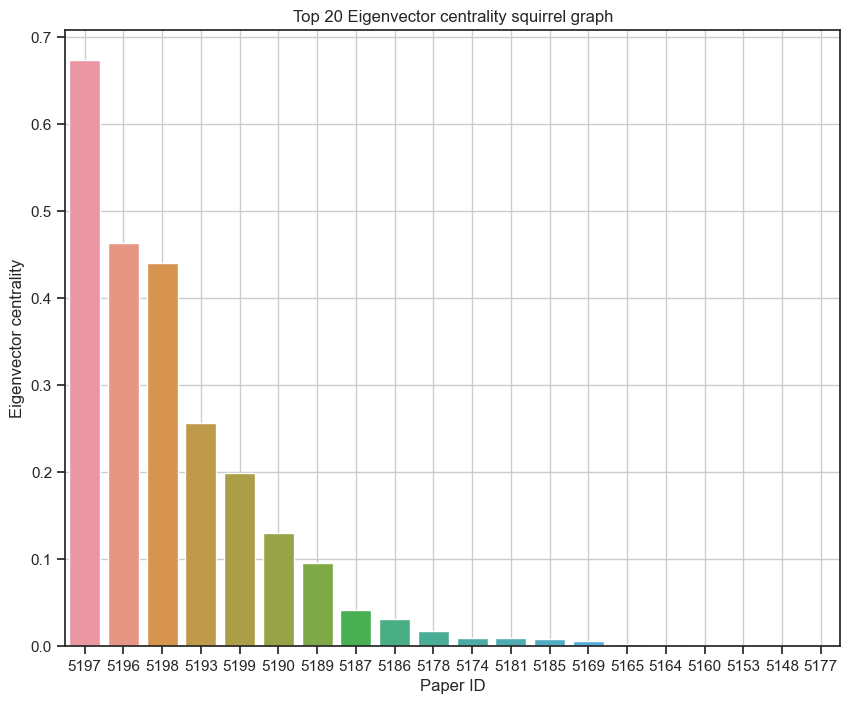

In [31]:
eigen_squirrel_graph = dict(sorted(eigen_squirrel_graph.items(), key=lambda x: x[1], reverse=True))
keys = list(map(str,list(eigen_squirrel_graph.keys())[:20]))
values = list(eigen_squirrel_graph.values())[:20]

# Create a barplot
sns.barplot(x=keys, y=values)

# Add labels and title
plt.xlabel('Paper ID')
plt.ylabel('Eigenvector centrality')
plt.title('Top 20 Eigenvector centrality squirrel graph')
plt.grid()
plt.show()

# Efficiency

In [32]:
# Calculate the weighted global efficiency
def weighted_global_efficiency(G):
  weighted_efficiency = 0
  for node in G.nodes():
      shortest_paths = nx.shortest_path_length(G, source=node, weight='weight')
      efficiency = sum([1.0 / d for d in shortest_paths.values() if d > 0])
      weighted_efficiency += efficiency

  weighted_efficiency /= (len(G) * (len(G) - 1))
  return round(weighted_efficiency, 3)

In [33]:
#efficiency sulla rete vista dalla GNN
weighted_global_efficiency(GNN_dist)

0.16

In [34]:
weighted_global_efficiency(squirrel_graph)

0.08

## Modularity

In [35]:

def weighted_modularty(G):
  # Compute the partition of the graph using the Louvain method
  partition = greedy_modularity_communities(G, weight='weight')

  # Compute the modularity of the partition using the Louvain method
  modularity = nx.algorithms.community.quality.modularity(G, partition, weight='weight')
  return round(modularity, 3)

In [36]:
print(weighted_modularty(GNN_sim))

0.316


In [37]:
print(weighted_modularty(squirrel_graph))

0.338


# Community

In [38]:
#define Jaccard Similarity function
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

comm_GNN = greedy_modularity_communities(GNN_sim, weight='weight')
comm_squirrel = greedy_modularity_communities(squirrel_graph)

In [39]:
print(len(comm_GNN))
print(len(comm_squirrel))

36
17


In [40]:
for com in comm_GNN:
    print(len(com))

2692
945
559
497
255
57
41
31
9
8
8
8
8
6
6
6
6
5
5
4
3
3
3
3
3
3
3
3
3
3
3
3
3
2
2
2


In [41]:
for com in comm_squirrel:
    print(len(com))

2485
1796
723
99
25
15
9
8
8
6
5
5
4
4
3
3
3


In [42]:
labels = df_nodes['label'].unique()
mapping = {}
for i in range(len(df_nodes)):
  mapping[i] = df_nodes.loc[i]['label']

In [43]:
def gini_index(cluster, labels):
    """
    Calculates the Gini Index for a given cluster of objects and 7 labels.

    Parameters:
        cluster (list): A list of objects in the cluster.
        labels (list): A list of 7 labels.

    Returns:
        float: The Gini Index for the given cluster and labels.
    """
    total_count = len(cluster)
    if total_count == 0:
        return 0.0

    gini_sum = 0.0
    for label in labels:
        label_count = sum([1 for obj in cluster if mapping[obj] == label])
        label_freq = label_count / total_count
        gini_sum += label_freq ** 2

    gini_index = 1.0 - gini_sum  
    return round(gini_index, 3)

In [44]:
import scipy

gini_GNN = [gini_index(i,labels) for i in comm_GNN]
gini_squirrel = [gini_index(i,labels) for i in comm_squirrel]
#scipy.stats.wilcoxon(gini_GNN, gini_squirrel)

In [45]:
print('mannwhitneyu',scipy.stats.mannwhitneyu(gini_GNN, gini_squirrel))

mannwhitneyu MannwhitneyuResult(statistic=225.0, pvalue=0.12155271657398019)


In [46]:
df_nodes['label'].unique()

array([1, 3, 0, 4, 2], dtype=int64)

<AxesSubplot:>

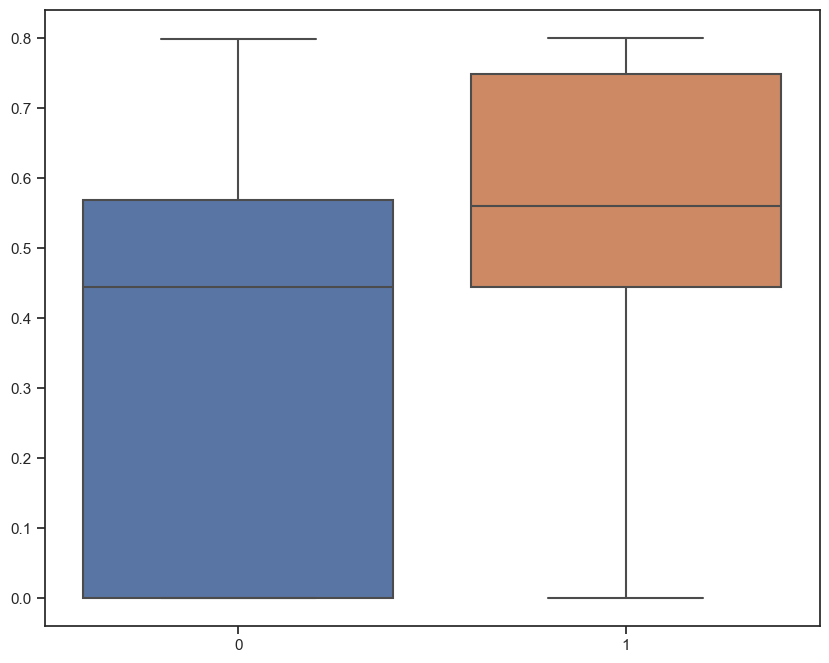

In [47]:
import numpy as np
import seaborn as sns

all_arr = [gini_GNN, gini_squirrel]

sns.boxplot(data=all_arr, )

In [48]:
gini=0
clusters = comm_GNN[:2]
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.789

In [49]:
gini=0
clusters = comm_squirrel[:2]
for com in clusters:
  
  gini += gini_index(com, labels)
avg_gini= round(gini/len(clusters), 3)

avg_gini

0.798

In [50]:
#out degree
x1 = list(GNN_dist_out_degree.keys())[:100]
x2 = list(squirrel_out_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.07959595959595961
p_value 0.2406442497922182
Jaccard Index: 0.9047619047619048
[633, 1655, 514, 613, 782, 1270, 1638, 1291, 1486, 737, 1106, 1346, 1548, 2040, 1618, 2103, 2955, 1950, 2304, 2349, 3210, 2068, 3031, 601, 2305, 2031, 2811, 2016, 2420, 2389, 3066, 3022, 1500, 2805, 293, 4346, 3365, 542, 3142, 3861, 2872, 487, 3462, 525, 3199, 3501, 1185, 31, 3396, 726, 3852, 42, 695, 3443, 1242, 1392, 367, 1021, 1916, 2767, 3521, 908, 2059, 371, 1341, 1237, 1588, 3980, 1867, 1394, 1434, 1782, 1327, 3820, 1543, 1749, 3494, 2002, 1865, 1384, 1530, 2348, 127, 1537, 2668, 3713, 1536, 4365, 1868, 3699, 848, 2140, 2310, 760, 4303, 3232, 4002, 3899, 1674, 1037]
[782, 1638, 514, 613, 633, 737, 1291, 1106, 1270, 1486, 1548, 1346, 2040, 1618, 1655, 2031, 1950, 2016, 2349, 2068, 2103, 2305, 2304, 2389, 2420, 2811, 3031, 601, 2805, 2955, 2872, 3066, 3022, 293, 3142, 3199, 3462, 3365, 4346, 3501, 487, 3210, 542, 3396, 3443, 695, 525, 1185, 1500, 3521, 3494, 3852, 1392, 2767, 31, 1021, 1916, 42, 7

In [51]:
#in degree
x1 = list(GNN_dist_in_degree.keys())[:100]
x2 = list(squirrel_in_degree.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
#w_t, w_p = stats.weightedtau(x1,x2) #vedo se considerarlo
print('tau:',tau)
print('p_value',p_value)
#print('w-tau:',w_t)
#print('w-p_value',w_p)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.3458585858585859
p_value 3.4229054920216766e-07
Jaccard Index: 0.8691588785046729
[5112, 4346, 4903, 4365, 5142, 5095, 4528, 5033, 5063, 4913, 4629, 5132, 4640, 4847, 5189, 5196, 4825, 4303, 5164, 4758, 4544, 4419, 4864, 4322, 3861, 5146, 5043, 4879, 5102, 5193, 4822, 5117, 4347, 5010, 4796, 4943, 5165, 3980, 4730, 4961, 5014, 5145, 4275, 5186, 5160, 5064, 4767, 4912, 5126, 4829, 4727, 4567, 4698, 4786, 5044, 4801, 5148, 4621, 3852, 5174, 4904, 4839, 5023, 4665, 4981, 4625, 4809, 5169, 5027, 5071, 4530, 4251, 4783, 5121, 3210, 4713, 4574, 4595, 4002, 4721, 4284, 4867, 4207, 4627, 4129, 4160, 3908, 2955, 4232, 4868, 3899, 4120, 4406, 4408, 5055, 4428, 4219, 3820, 4217, 3889]
[5112, 4346, 4903, 4365, 5095, 5033, 5063, 5189, 5132, 5164, 5196, 4303, 4847, 4864, 4419, 5193, 4879, 5043, 5102, 5117, 4322, 4796, 4544, 4943, 5165, 4758, 4347, 5174, 5014, 5148, 5186, 4829, 5044, 4275, 4801, 5126, 5146, 5023, 4698, 5121, 5145, 5010, 5160, 5142, 5169, 4528, 4727, 4904, 5027, 5071, 4721, 480

In [52]:
#betweennes
x1 = list(GNN_betweeness.keys())[:100]
x2 = list(bet_squirrel_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.12363636363636366
p_value 0.06836286283177276
Jaccard Index: 0.6949152542372882
[4346, 4303, 3462, 3852, 2805, 2031, 1638, 4365, 1742, 3031, 3290, 1548, 1316, 3232, 2389, 4275, 2790, 782, 2811, 4841, 3637, 1513, 2954, 2251, 3948, 4236, 4544, 2040, 2349, 3501, 601, 4796, 2717, 4128, 4160, 4419, 4073, 4555, 4088, 4372, 2294, 4903, 1106, 3066, 2059, 3978, 4758, 4829, 3291, 3980, 2668, 1930, 4436, 3434, 2396, 2610, 2883, 3365, 1630, 3199, 2142, 2382, 2870, 3580, 2016, 3989, 1486, 1727, 2849, 1938, 3482, 4331, 3443, 1875, 3198, 2687, 2794, 1916, 3413, 2725, 4057, 2228, 5112, 2715, 4936, 3713, 4425, 4864, 2504, 2720, 3263, 2820, 3447, 3319, 3269, 2947, 4879, 3494, 4267, 1291]
[4346, 4303, 3462, 3852, 3031, 3290, 4275, 1638, 3232, 1316, 1742, 4365, 2805, 2790, 2040, 1548, 2811, 2349, 2389, 3637, 1513, 4544, 3501, 2251, 3066, 4128, 4903, 601, 2031, 2717, 4419, 4841, 2954, 3980, 4372, 782, 1486, 4758, 4088, 3989, 3443, 4073, 2955, 3521, 2849, 1875, 3434, 3580, 1930, 2382, 1106, 2059, 479

In [53]:
#closeness
x1 = list(GNN_closeness.keys())[:20]
x2 = list(closeness_squirrel_graph.keys())[:20]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)
print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )
print(x1)
print(x2)

tau: 0.2631578947368421
p_value 0.11260412706479736
Jaccard Index: 0.5384615384615384
[5164, 5112, 5186, 5189, 5174, 5193, 5187, 5095, 5121, 5196, 5055, 5033, 5063, 5023, 5178, 5117, 5148, 5132, 5165, 5007]
[5112, 5164, 5196, 5189, 5186, 5193, 5095, 5174, 5165, 5132, 5117, 5148, 5063, 4903, 5169, 5126, 5121, 5146, 5145, 5160]


In [54]:
#eigenvector

x1 = list(GNN_eigenvector.keys())[:100]
x2 = list(eigen_squirrel_graph.keys())[:100]
tau, p_value = stats.kendalltau(x1, x2)
j = jaccard(x1,x2)

print('tau:',tau)
print('p_value',p_value)
print('Jaccard Index:', j )

print(x1)
print(x2)

tau: 0.44000000000000006
p_value 8.794753500710073e-11
Jaccard Index: 1.0
[5196, 5197, 5193, 5189, 5190, 5198, 5187, 5199, 5186, 5178, 5174, 5169, 5185, 5181, 5165, 5164, 5160, 5153, 5148, 5146, 5177, 5145, 5150, 5137, 5142, 5132, 5126, 5175, 5161, 5121, 5170, 5149, 5179, 5117, 5144, 5171, 5154, 5112, 5130, 5151, 5102, 5131, 5168, 5099, 5176, 5095, 5115, 5180, 5120, 5071, 5166, 5105, 5124, 5100, 5064, 5191, 5063, 5192, 5055, 5139, 5044, 5134, 5092, 5194, 5155, 5047, 5043, 5050, 5141, 5033, 5052, 5096, 5027, 5195, 5167, 5023, 5030, 5078, 5057, 5014, 5018, 5182, 5075, 5127, 5024, 5019, 5010, 5013, 5035, 5037, 5053, 5007, 5000, 4981, 5058, 5002, 5028, 4971, 4961, 5004]
[5197, 5196, 5198, 5193, 5199, 5190, 5189, 5187, 5186, 5178, 5174, 5181, 5185, 5169, 5165, 5164, 5160, 5153, 5148, 5177, 5146, 5150, 5145, 5142, 5137, 5175, 5132, 5149, 5179, 5161, 5170, 5126, 5171, 5144, 5154, 5121, 5151, 5117, 5112, 5131, 5168, 5166, 5115, 5192, 5176, 5180, 5130, 5102, 5099, 5191, 5120, 5095, 5124, 5139, 